In [2]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from utils import sqrtm, bures, MI_dist, MK_dist, KR_dist

## Noise

Signal supported on k directions out of d

In [3]:
A = np.array([[2., 0.5, -0.1, 0.3],
             [0.5, 0.5, -0.3, -0.2],
             [-0.1, -0.3, 1, 0.5],
             [0.3, -0.2, 0.5, 1.5]])

B = np.array([[.5, -0.5, 0.1, -0.2],
             [-0.5, 2, 0.3, 0.4],
             [0.1, 0.3, 1, -0.5],
             [-0.2, 0.4, -0.5, 1.]])

### k = 4, d = 8

In [24]:
r = 4
d = A.shape[0]
eps = 5e-1

n = 100

errs = np.array([1e-3, 1e-2, 1e-1, 2e-1])
nerrs = len(errs)

A /= np.linalg.norm(A)
B /= np.linalg.norm(B)

K = np.arange(1, d+r+1)

mks = np.zeros((n, nerrs, d+r))
mis = np.zeros((n, nerrs, d+r))
bs = np.zeros((n, nerrs))
krs = np.zeros((n, nerrs))

for i in range(n):

    A_zero = np.zeros((d + r, d + r))
    B_zero = np.zeros((d + r, d + r))

    L1 = np.random.randn(d + r, d + r)
    L2 = np.random.randn(d + r, d + r)

    A_zero[:d, :d] = A
    B_zero[:d, :d] = B

    for j, eps in enumerate(errs):

        A_noisy = A_zero + eps * L1.dot(L1.T) / (d+r)
        B_noisy = B_zero + eps * L2.dot(L2.T) / (d+r)

        krs[i, j] = KR_dist(A_noisy, B_noisy)
        bs[i, j] = bures(A_noisy, B_noisy)


        for k in K:
            mis[i, j, k-1] = MI_dist(A_noisy, B_noisy, k)
            mks[i, j, k-1] = MK_dist(A_noisy, B_noisy, k)

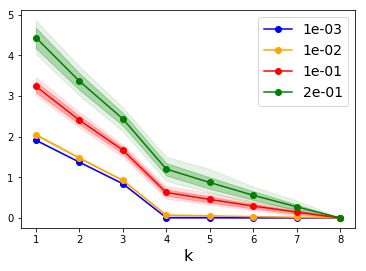

In [25]:
f, ax = plt.subplots(1, 1)

colors = ['blue', 'orange', 'red', 'green']


for j in range(nerrs):
    
    ax.plot(K, (mis - bs[:, :, None]).mean(axis=0)[j], marker='o', label = '%.0e' % errs[j], color = colors[j])

    ax.fill_between(K, np.quantile(mis - bs[:, :, None], 0.1, axis=0)[j], np.quantile(mis - bs[:, :, None], 0.9, axis=0)[j], alpha = 0.1, color = colors[j])
    ax.fill_between(K, np.quantile(mis - bs[:, :, None], 0.25, axis=0)[j], np.quantile(mis - bs[:, :, None], 0.75, axis=0)[j], alpha = 0.25, color = colors[j])

ax.set_xlabel('k', fontsize = 16)
ax.legend(fontsize = 14)
          
plt.show()

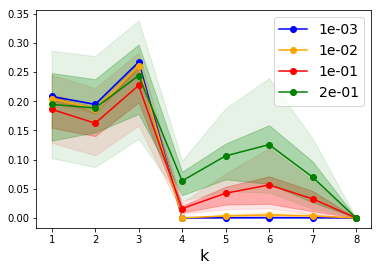

In [22]:
f, ax = plt.subplots(1, 1)


for j in range(nerrs):
    
    ax.plot(K, (mks - bs[:, :, None]).mean(axis=0)[j], marker='o', label = '%.0e' % errs[j],  color = colors[j])
    ax.fill_between(K, np.quantile(mks - bs[:, :, None], 0.1, axis=0)[j], np.quantile(mks - bs[:, :, None], 0.9, axis=0)[j], alpha = 0.1,  color = colors[j])
    ax.fill_between(K, np.quantile(mks - bs[:, :, None], 0.25, axis=0)[j], np.quantile(mks - bs[:, :, None], 0.75, axis=0)[j], alpha = 0.25,  color = colors[j])

ax.set_xlabel('k', fontsize = 16)
ax.legend(fontsize = 14)

plt.show()

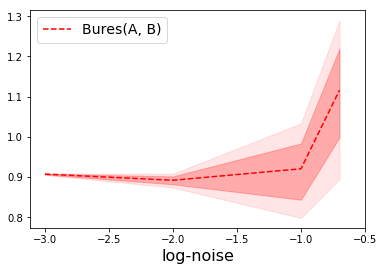

In [23]:
f, ax = plt.subplots(1, 1)
  
ax.plot(np.log10(errs), bs.mean(axis = 0), linestyle = '--', color = 'red', label = 'Bures(A, B)')
ax.fill_between(np.log10(errs), np.quantile(bs, 0.1, axis = 0), np.quantile(bs, 0.9, axis = 0), color = 'red', alpha = 0.1)
ax.fill_between(np.log10(errs), np.quantile(bs, 0.25, axis = 0), np.quantile(bs, 0.75, axis = 0), color = 'red', alpha = 0.25)

ax.set_xlim(right = -.5)

ax.set_xlabel('log-noise', fontsize = 16)

plt.legend(fontsize=14, loc='upper left')

### k = 4, d = 16

In [26]:
r = 12
d = A.shape[0]
eps = 5e-1

n = 100

errs = np.array([1e-3, 1e-2, 1e-1, 2e-1])
nerrs = len(errs)

A /= np.linalg.norm(A)
B /= np.linalg.norm(B)

K = np.arange(1, d+r+1)

mks = np.zeros((n, nerrs, d+r))
mis = np.zeros((n, nerrs, d+r))
bs = np.zeros((n, nerrs))
krs = np.zeros((n, nerrs))

for i in range(n):

    A_zero = np.zeros((d + r, d + r))
    B_zero = np.zeros((d + r, d + r))

    L1 = np.random.randn(d + r, d + r)
    L2 = np.random.randn(d + r, d + r)

    A_zero[:d, :d] = A
    B_zero[:d, :d] = B

    for j, eps in enumerate(errs):

        A_noisy = A_zero + eps * L1.dot(L1.T) / (d+r)
        B_noisy = B_zero + eps * L2.dot(L2.T) / (d+r)

        krs[i, j] = KR_dist(A_noisy, B_noisy)
        bs[i, j] = bures(A_noisy, B_noisy)


        for k in K:
            mis[i, j, k-1] = MI_dist(A_noisy, B_noisy, k)
            mks[i, j, k-1] = MK_dist(A_noisy, B_noisy, k)

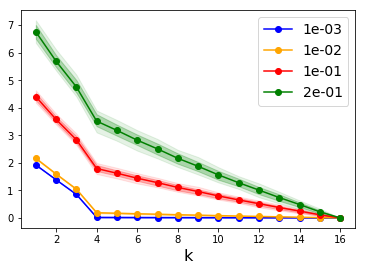

In [27]:
f, ax = plt.subplots(1, 1)

colors = ['blue', 'orange', 'red', 'green']


for j in range(nerrs):
    
    ax.plot(K, (mis - bs[:, :, None]).mean(axis=0)[j], marker='o', label = '%.0e' % errs[j], color = colors[j])

    ax.fill_between(K, np.quantile(mis - bs[:, :, None], 0.1, axis=0)[j], np.quantile(mis - bs[:, :, None], 0.9, axis=0)[j], alpha = 0.1, color = colors[j])
    ax.fill_between(K, np.quantile(mis - bs[:, :, None], 0.25, axis=0)[j], np.quantile(mis - bs[:, :, None], 0.75, axis=0)[j], alpha = 0.25, color = colors[j])

ax.set_xlabel('k', fontsize = 16)
ax.legend(fontsize = 14)
          
plt.show()

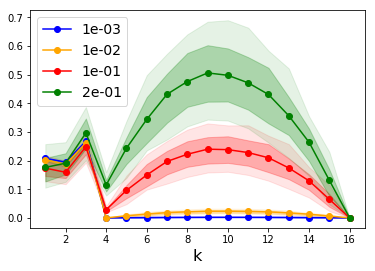

In [28]:
f, ax = plt.subplots(1, 1)


for j in range(nerrs):
    
    ax.plot(K, (mks - bs[:, :, None]).mean(axis=0)[j], marker='o', label = '%.0e' % errs[j],  color = colors[j])
    ax.fill_between(K, np.quantile(mks - bs[:, :, None], 0.1, axis=0)[j], np.quantile(mks - bs[:, :, None], 0.9, axis=0)[j], alpha = 0.1,  color = colors[j])
    ax.fill_between(K, np.quantile(mks - bs[:, :, None], 0.25, axis=0)[j], np.quantile(mks - bs[:, :, None], 0.75, axis=0)[j], alpha = 0.25,  color = colors[j])

ax.set_xlabel('k', fontsize = 16)
ax.legend(fontsize = 14)

plt.show()

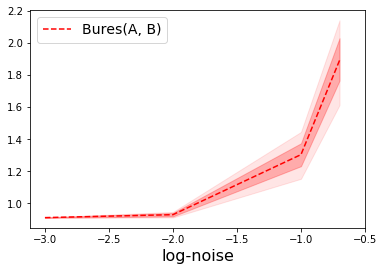

In [29]:
f, ax = plt.subplots(1, 1)
  
ax.plot(np.log10(errs), bs.mean(axis = 0), linestyle = '--', color = 'red', label = 'Bures(A, B)')
ax.fill_between(np.log10(errs), np.quantile(bs, 0.1, axis = 0), np.quantile(bs, 0.9, axis = 0), color = 'red', alpha = 0.1)
ax.fill_between(np.log10(errs), np.quantile(bs, 0.25, axis = 0), np.quantile(bs, 0.75, axis = 0), color = 'red', alpha = 0.25)

ax.set_xlim(right = -.5)

ax.set_xlabel('log-noise', fontsize = 16)

plt.legend(fontsize=14, loc='upper left')